In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 
import nltk
from io import StringIO
import collections as co
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('Replaced.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,...,reviews_id,reviews.numHelpful,rating,sourceURLs,text,title,userCity,userProvince,username,upc
0,0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.03E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Japan,NaN,Joshua,6.03E+11
1,1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,Japan,NaN,Dorothy W,73416000391
2,2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,America,NaN,Dorothy W,73416000391
3,3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,China,NaN,Rebecca,67981934427
4,4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,China,NaN,Walker557,67981934427


#### Total number of ratings

In [3]:
print('In all, there are ',df['rating'].nunique(),'types of ratings in the dataset: ',df['rating'].unique())

In all, there are  5 types of ratings in the dataset:  [5 1 3 4 2]


#### Total number of products

In [4]:
print('In all, there are ',df['name'].nunique(),'products in the dataset: ',df['name'].unique())

In all, there are  600 products in the dataset:  ['Pink Friday: Roman Reloaded Re-Up (w/dvd)'
 'Lundberg Organic Cinnamon Toast Rice Cakes'
 'K-Y Love Sensuality Pleasure Gel' 'J.R. Watkins Hand Cream, Lemon Cream'
 'Ambi Complexion Cleansing Bar'
 "Johnson's Baby Bubble Bath and Wash, 15oz"
 'Olay Regenerist Deep Hydration Regenerating Cream'
 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)'
 'Heinz Tomato Ketchup, 38oz'
 'Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count'
 'Pantene Color Preserve Volume Shampoo, 25.4oz'
 'Aussie Aussome Volume Shampoo, 13.5 Oz' "Cars Toon: Mater's Tall Tales"
 'CeraVe SA Renewing Cream' 'Solo Foods Almond Paste'
 'Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count'
 'Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler'
 'Pearhead Id Bracelet Frame'
 'Craft Punch Giga Scallop Circle 45 24687534 To 334'
 'Neutrogena Wet Skin Sunscreen Spray Broad Spectrum SPF 50, 5oz'
 "Meguiar's Deep Crystal Car Was

***How rating is distributed***

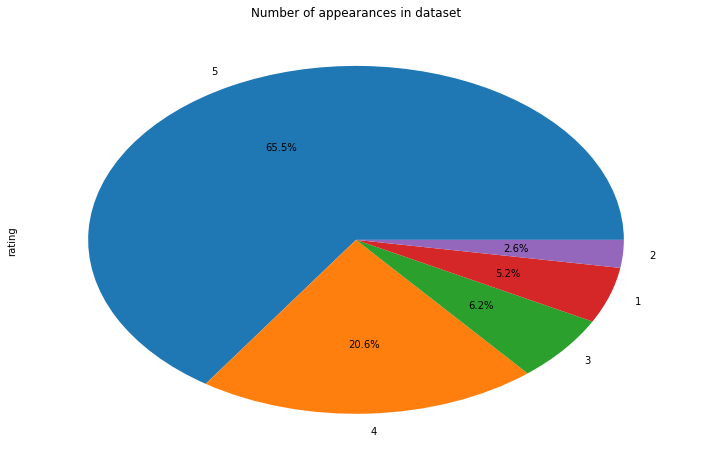

In [5]:
plt.figure(figsize=(12,8))
df.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in dataset')
plt.show()

**Year-wise Distribution of reviews**

In [6]:
df['reviewsdate'] = pd.to_datetime(df['reviewsdate'], errors='coerce')

In [7]:
df['reviewsdate']=df.reviewsdate.dt.year
df[:9]

,UserId,brand,categories,name,text,title,rating,dateAdded,dateUpdated,ean,...,manufacturerNumber,reviewsdate,dateSeen,didPurchase,doRecommend,reviews_id,sourceURLs,userCity,username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Just Awesome,5,2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.03E+11,...,14331328,2012.0,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,NaN,NaN,https://redsky.target.com/groot-domain-api/v1/...,Japan,Joshua,6.03E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Good,5,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,...,574764,2017.0,2017-09-16T09:45:00.000Z,True,True,100209113.0,https://www.walmart.com/reviews/product/29775278,Japan,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Good,5,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,...,574764,2017.0,2017-08-23T10:37:00.000Z,True,True,100209113.0,https://www.walmart.com/reviews/product/29775278,America,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Disappointed,1,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,...,67981934427,2016.0,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,113026909.0,https://www.walmart.com/reviews/product/43383370,China,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Irritation,1,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,...,67981934427,2016.0,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,171267657.0,https://www.walmart.com/reviews/product/43383370,China,Walker557,67981934427
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,My boyfriend and I bought this to spice things...,Not worth it,1,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,...,67981934427,2016.0,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,149773828.0,https://www.walmart.com/reviews/product/43383370,Australia,Samantha,67981934427
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,Bought this earlier today and was excited to c...,Disappointing,1,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,...,67981934427,2016.0,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,129088591.0,https://www.walmart.com/reviews/product/43383370,Japan,Raeanne,67981934427
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,I bought this product for my husband and I to ...,Not happy at all,1,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,...,67981934427,2016.0,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,131769441.0,https://www.walmart.com/reviews/product/43383370,UK,Kimmie,67981934427
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,My husband and I bought this for some extra fu...,Very disappointing,1,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,...,67981934427,2016.0,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",False,False,148314686.0,https://www.walmart.com/reviews/product/43383370,Europe,cassie,67981934427


In [8]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [9]:
print('The Ratings along with their occurence in every year:')
df.groupby((['reviewsdate','rating'])).size()

The Ratings along with their occurence in every year:


reviewsdate  rating
2006.0       5             1
2007.0       3             1
             5            20
2008.0       1             4
             2             5
             3             9
             4            16
             5            51
2009.0       1            27
             2            20
             3            38
             4           139
             5           536
2010.0       1            84
             2            28
             3            42
             4           150
             5           686
2011.0       1            94
             2            42
             3            49
             4           184
             5           614
2012.0       1           310
             2           151
             3           192
             4           948
             5          5255
2013.0       1           387
             2           171
             3           172
             4           506
             5          1736
2014.0       1         

The Year-wise distribution of products


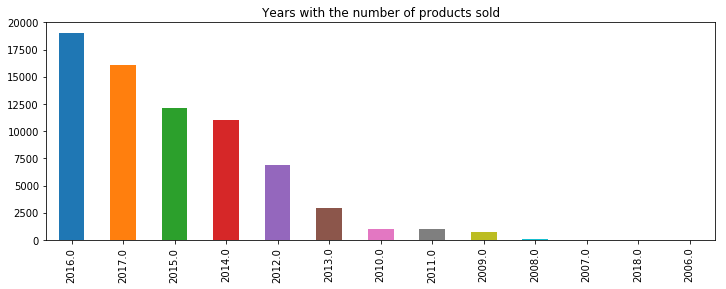

In [12]:
print("The Year-wise distribution of products")
year_no_of_shows=df["reviewsdate"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,4))
year_no_of_shows.plot(title='Years with the number of products sold',kind="bar")

***Review Level***

In [13]:
df1=df[df['title'].notnull()]

#### Remvoing rows with no values

In [14]:
string=StringIO()
df1['title'].apply(lambda x: string.write(x))
x=string.getvalue()
string.close()
x=x.lower()
x=x.split()

In [15]:
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\RIO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
words = co.Counter(nltk.corpus.words.words())
stopWords =co.Counter( nltk.corpus.stopwords.words() )
x=[i for i in x if i in words and i not in stopWords]
string=" ".join(x)
c = co.Counter(x)

***Most Common Words in reviews***

In [17]:
most_common_10=c.most_common(10)
print('The 10 Most Common Words in reviews are: ')
most_common_10

The 10 Most Common Words in reviews are: 


[('movie', 1541),
 ('love', 1416),
 ('product', 1336),
 ('great', 1308),
 ('good', 1271),
 ('family', 898),
 ('best', 544),
 ('total', 532),
 ('like', 513),
 ('new', 419)]

**Popular Products**

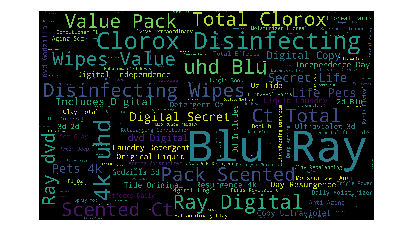

In [9]:
wordcloud1 = WordCloud(
                          background_color='black',
                          width=8000,
                          height=5000,
                          relative_scaling = 1.0
                         ).generate(" ".join(df['name']))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()